In [79]:
pip install matplotlib

  Using cached matplotlib-3.3.2-cp36-cp36m-manylinux1_x86_64.whl (11.6 MB)
     |████████████████████████████████| 156 kB 376 kB/s eta 0:00:01
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.whl (88 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
     |████████████████████████████████| 2.2 MB 4.2 MB/s eta 0:00:01
  Attempting uninstall: certifi
    Found existing installation: certifi 2019.11.28
    Uninstalling certifi-2019.11.28:
      Successfully uninstalled certifi-2019.11.28
Note: you may need to restart the kernel to use updated packages.


In [80]:
import numpy 
import scipy.special
import matplotlib.pyplot as plt

# определение класса нейронной сети
class neuralNetwork:
    # инициализировать нейронную сеть
    def __init__(self, inputnodes, hiddennodes, outputnodes, learnningrate):
        # Задать количество узлов во входном, скрытом и выходном слое.
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Коэффициент обучения.
        self.lr = learnningrate
        
        
        # Матрицы весовых коэффициентов связей wih (между входным и скрытым
        # слоями) и who (между скрытым и выходным слоями).
        # Весовые коэффициенты связей между узлом i и узлом j следующего слоя
        # обозначены как w_i_j:
        # wll w21
        # wl2 w22 и т.д.
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # использование сигмоиды в качестве функции активации 
        self.activation_function = lambda x:scipy.special.expit(x)
        
        pass
    
    
    # тренировка нейронной сети
    def train(self, inputs_list, targets_list):
        # преобразовать список входных значений в двухмерный массив 
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя 
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        #ошибка = целевое значение - фактическое значение
        output_errors = targets - final_outputs
        
        # ошибки скрытого слоя - это ошибки output_errors,
        # распределенные пропорционально весовым коэффициентам связей
        # и рекомбинированные на скрытых узлах 
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # обновить весовые коэффициенты связей между скрытым и выходным слоями 
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # обновить весовые коэффициенты связей между входным и скрытым слоями
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs *(1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        
        pass
    
    
    # опрос нейронной сети
    def query(self, inputs_list):
        
        # преобразовать список входных значений
        # в двухмерный массив
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # рассчитать входящие сигналы для скрытого слоя 
        hidden_inputs = numpy.dot(self.wih, inputs)
        # рассчитать исходящие сигналы для скрытого слоя
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # рассчитать входящие сигналы для выходного слоя
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # рассчитать исходящие сигналы для выходного слоя
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [81]:
# количество входных, скрытых и выходных узлов
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
# коэффициент обучения равен 0,3
learning_rate = 0.3


In [82]:
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [83]:

n.query([1.0, 0.5, -1.5])

array([[0.47397477],
       [0.7648219 ],
       [0.70971022]])

In [84]:
# количество входных, скрытых и выходных узлов
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
# коэффициент обучения равен 0,3
learning_rate =0.3
# создать экземпляр нейронной сети
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# загрузить в список тестовый набор данных CSV-файла набора MNIST
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
# тренировка нейронной сети
# перебрать все записи в тренировочном наборе данных
for record in training_data_list:
    # получить список значений, используя символы запятой (1,1)
    # в качестве разделителей
    all_values = record.split(',')
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # создать целевые выходные значения (все равны 0,01, за исключением
    # желаемого маркерного значения, равного 0,99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] - целевое маркерное значение для данной записи
    targets[int(all_values[0])] =0.99
    n.train(inputs, targets)
    pass

In [85]:
# загрузить в список тестовый набор данных CSV-файла набора MNIST
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [91]:
# тестирование нейронной сети
# журнал оценок работы сети, первоначально пустой
scorecard = []
# перебрать все записи в тестовом наборе данных
for record in test_data_list:
    # получить список значений из записи, используя символы
    # запятой (*,1) в качестве разделителей
    all_values = record.split(',')
    # правильный ответ - первое значение
    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    # масштабировать и сместить входные значения
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # опрос сети
    outputs = n.query(inputs)
    # индекс наибольшего значения является маркерным значением
    label = numpy.argmax(outputs)
    print(label, "ответ сети")
    # присоединить оценку ответа сети к концу списка
    if (label == correct_label) :
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)
        pass
        pass
# рассчитать показатель эффективности в виде
# доли правильных ответов
scorecard_array = numpy.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() / scorecard_array.size)

7 истинный маркер
7 ответ сети
2 истинный маркер
0 ответ сети
1 истинный маркер
1 ответ сети
0 истинный маркер
0 ответ сети
4 истинный маркер
4 ответ сети
1 истинный маркер
1 ответ сети
4 истинный маркер
4 ответ сети
9 истинный маркер
3 ответ сети
5 истинный маркер
1 ответ сети
9 истинный маркер
7 ответ сети
эффективность =  0.6


In [93]:
# тренировка нейронной сети
# переменная epochs указывает, сколько раз тренировочный
# набор данных используется для тренировки сети
epochs = 2
for е in range(epochs):
    # перебрать все записи в тренировочном наборе данных
    for record in training_data_list:
        # получить список значений из записи, используя символы
        # запятой (', 1) в качестве разделителей
        all_values = record.split(',')
        # масштабировать и сместить входные значения
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # создать целевые выходные значения (все равны 0,01, за
        # исключением желаемого маркерного значения, равного 0,99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] - целевое маркерное значение для
        # данной записи
        targets[int(all_values[0])] =0.99
        n.train(inputs, targets)
        pass
        pass

In [86]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


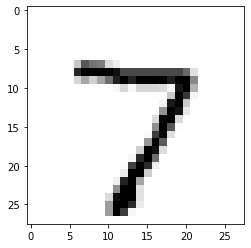

In [87]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [88]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.02425959],
       [0.00360716],
       [0.02299439],
       [0.05427323],
       [0.03235353],
       [0.04299016],
       [0.01946443],
       [0.869953  ],
       [0.02003863],
       [0.03534519]])

In [10]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'rb')
data_list = data_file.readlines()
data_file.close()


In [13]:
len(data_list)

100

In [15]:
data_list[0]

b'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [22]:
import numpy 
import matplotlib.pyplot as plt

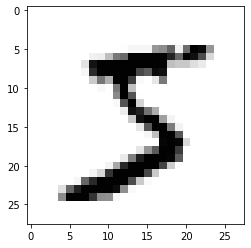

In [23]:
all_values = data_list[0].decode('utf-8').split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys',interpolation='None')

In [24]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [25]:
# количество выходных узлов - 10 (пример)
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] =0.99


In [26]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])